In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Advance Data Analytics Assignments /Ehsan Faizy - DIKW_HW_Activity.csv')

In [5]:
df.shape

(5, 9)

In [12]:
df.head()

,EmployeeID,EmployeeName,Department,JoiningDate,Salary,Gender,Country,PerformanceScore,JobSatisfaction
0,E001,James Wilson,Sales,2022-01-15,50000,Male,USA,85,4
1,E002,Maria Garcia,Engineering,2021-03-12,75000,Female,UK,92,5
2,E003,Robert Brown,HR,2020-06-23,60000,Male,Canada,88,4
3,E004,Emily Davis,Engineering,2021-11-05,72000,Female,USA,79,3
4,E005,Michael Johnson,Marketing,2022-05-20,65000,Male,Australia,83,4


In [10]:
df.describe()

,Salary,PerformanceScore,JobSatisfaction
count,5.000000,5.000000,5.000000
mean,64400.000000,85.400000,4.000000
std,9964.938535,4.929503,0.707107
min,50000.000000,79.000000,3.000000
25%,60000.000000,83.000000,4.000000
50%,65000.000000,85.000000,4.000000
75%,72000.000000,88.000000,4.000000
max,75000.000000,92.000000,5.000000


# **1. Data:**


In [27]:
dtype = df.loc[0: ].dtypes
print(dtype)

EmployeeID          object
EmployeeName        object
Department          object
JoiningDate         object
Salary               int64
Gender              object
Country             object
PerformanceScore     int64
JobSatisfaction      int64
dtype: object


In [35]:
dtype.value_counts()

,count
object,6
int64,3


So in DataSet we have 6 Catagorical data and 3 Numerical data

In [44]:
gender = df['Gender']
gender
gender.value_counts()

,count
Gender,
Male,3
Female,2


In [52]:
gender_in_country = df.groupby('Gender')['Country'].value_counts()
gender_in_country

Gender  Country  
Female  UK           1
        USA          1
Male    Australia    1
        Canada       1
        USA          1
Name: count, dtype: int64

It shows that there are just 2 Females in our dataset, one in UK and one in USA.
There are 3 Males, One from Australia ,One from Canada and one from USA.

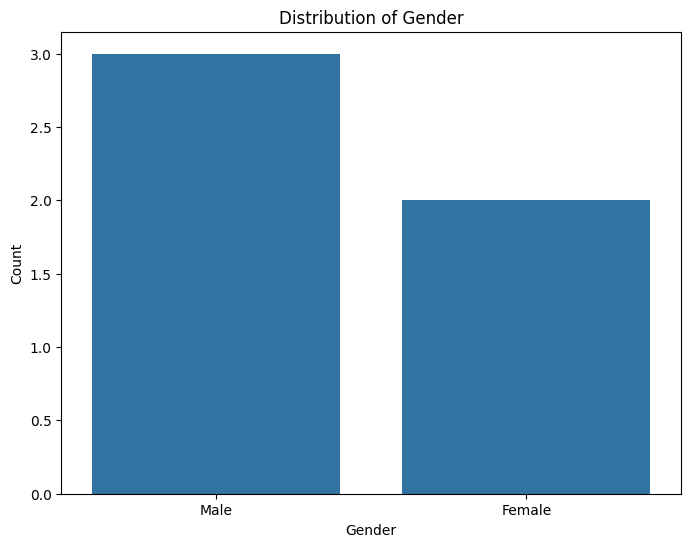

<Figure size 1000x600 with 0 Axes>

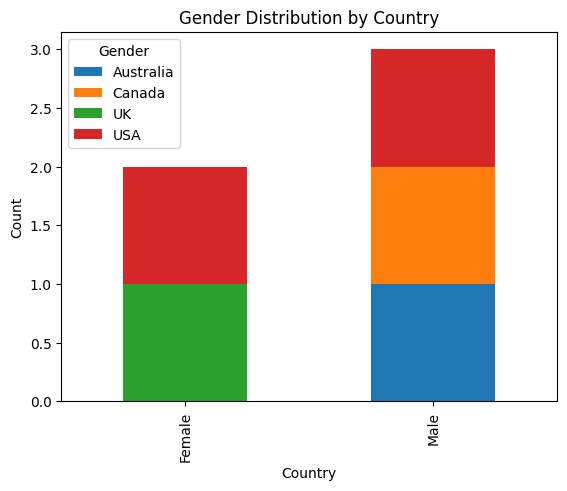

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
gender_in_country.unstack().plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# 2. Information:

In [54]:
avg_dep = df.groupby('Department')['Salary'].mean()
avg_dep

,Salary
Department,
Engineering,73500.0
HR,60000.0
Marketing,65000.0
Sales,50000.0


The average salary in the Engineering department is $73,500.

---


The average salary in the HR department is $60000.

---


The average salary in the Marketing department is $65000.

---


The average salary in the Sales department is $50000.

---



In [56]:
num_emp_country = df.groupby('Country')['EmployeeName'].count()
num_emp_country

,EmployeeName
Country,
Australia,1
Canada,1
UK,1
USA,2


The number of employees in the USA is 2

---

The number of employees in the Australia is 1

---

The number of employees in the UK is 1

---

The number of employees in the Canada is 1

In [61]:
avg_emp_per_score = df['PerformanceScore'].agg(np.mean)
avg_emp_per_score

<ipython-input-61-699234ce6d87>:1: FutureWarning: The provided callable <function mean at 0x798cec5f9000> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_emp_per_score = df['PerformanceScore'].agg(np.mean)


85.4

The Average performance score for all Employee is 85.4

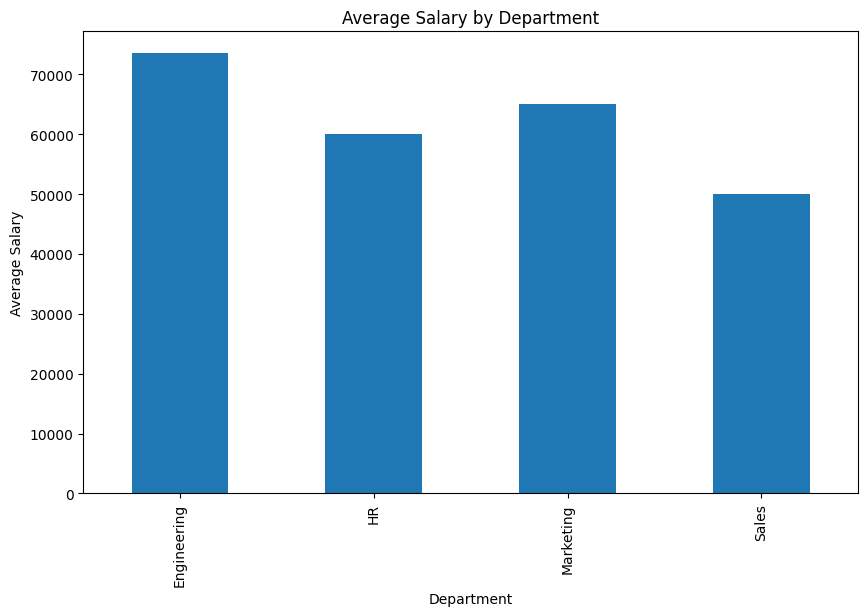

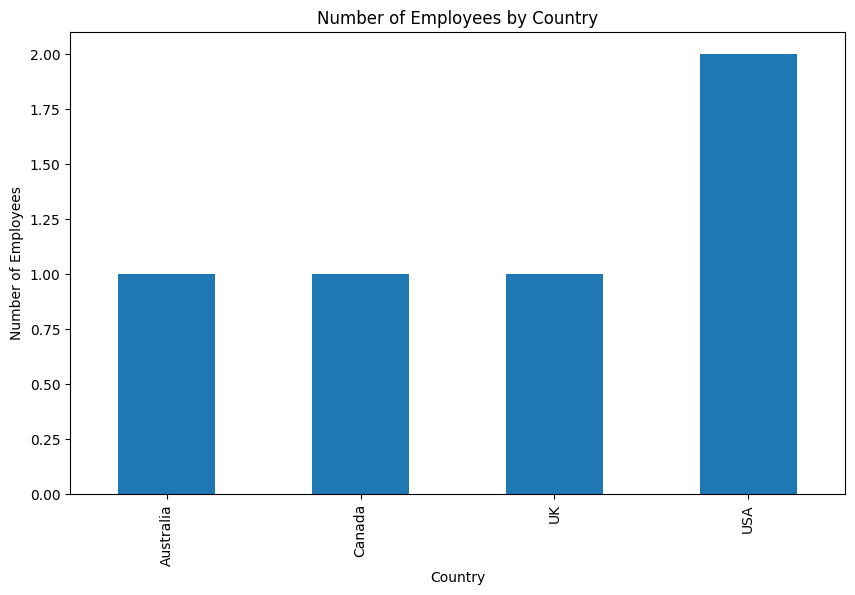

The average performance score for all employees is: 85.4


In [97]:
plt.figure(figsize=(10, 6))
avg_dep.plot(kind='bar')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

plt.figure(figsize=(10, 6))
num_emp_country.plot(kind='bar')
plt.title('Number of Employees by Country')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.show()

print(f"The average performance score for all employees is: {avg_emp_per_score}")

# 3. Knowledge:

In [75]:
hig_avrg_per_dep = df.groupby('Department')[['PerformanceScore']].agg(np.mean)
print(hig_avrg_per_dep)
print('Highest average performance score is :', hig_avrg_per_dep.max())

             PerformanceScore
Department                   
Engineering              85.5
HR                       88.0
Marketing                83.0
Sales                    85.0
Highest average performance score is : PerformanceScore    88.0
dtype: float64


<ipython-input-75-a35df09ba3cd>:1: FutureWarning: The provided callable <function mean at 0x798cec5f9000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hig_avrg_per_dep = df.groupby('Department')[['PerformanceScore']].agg(np.mean)


So HR Department has the Highest average performance score 88.0.

---
As much I know the HR Departmnet role in an Organization is very crucial, HR dep Manage, hire, promote, determine salaries, fire employees, train the employees and much more and HR Dep has direct relationship with performance measurements and management and has strong relationship with all employees

---




In [83]:
job_sats_per_country = df.groupby('Country')['JobSatisfaction'].mean()
print(job_sats_per_country)
print('The most satisfied employees by country is:',job_sats_per_country.max())

Country
Australia    4.0
Canada       4.0
UK           5.0
USA          3.5
Name: JobSatisfaction, dtype: float64
The most satisfied employees by country is: 5.0


The maximum is 5.0 which belong to UK, So the most satistfied employees belong to UK

---





<Figure size 1000x600 with 0 Axes>

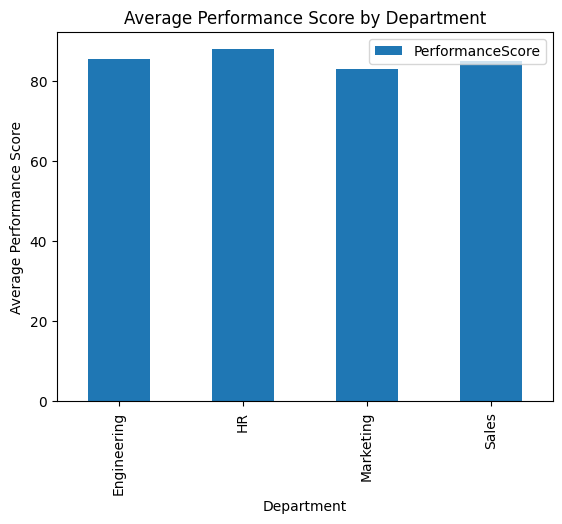

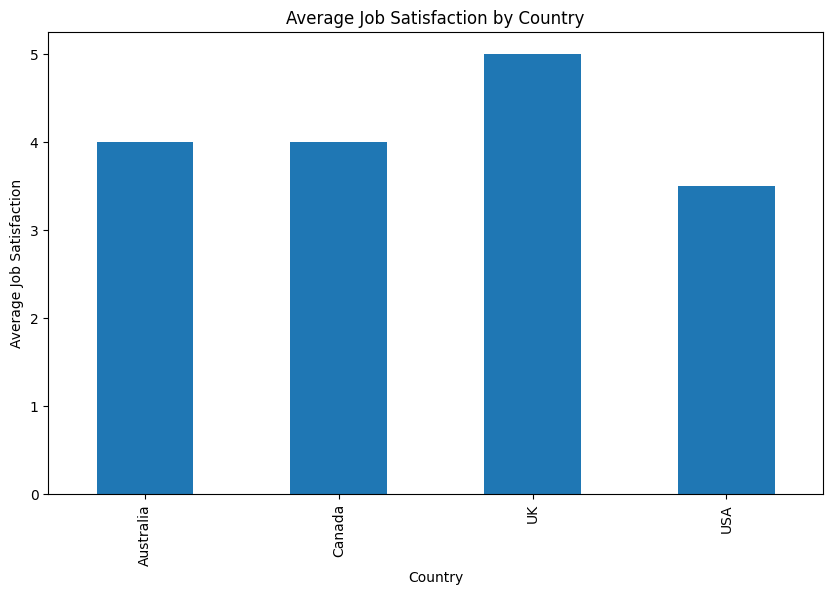

In [98]:
plt.figure(figsize=(10, 6))
hig_avrg_per_dep.plot(kind='bar')
plt.title('Average Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.show()

plt.figure(figsize=(10, 6))
job_sats_per_country.plot(kind='bar')
plt.title('Average Job Satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Job Satisfaction')
plt.show()

# 4. Applying Wisdom for Decision-Making:

**Improving Job Satisfaction:** Find out what’s causing low satisfaction in the department, like too much work, lack of support from managers, or feeling unappreciated. To improve this, consider holding regular check-ins, allowing flexible work schedules, and recognizing employees’ efforts more often.

---



**Training and Incentives:** Focus on building skills where employees are struggling, like communication, technical abilities, or teamwork. Rewards like bonuses, opportunities for career growth, or extra time off could also encourage better performance.

---



**Gender Pay Gaps:** Since there are only 2 women in the dataset, it's important to check for any pay differences between men and women. Making sure salaries are fair and following clear.

---

